In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec

In [3]:
def get_events(tstamp,state, type):
    if type == "UP":
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==1,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events
    elif type == 'DOWN':
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==0,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events        
    elif type == "BOTH":
        mask = np.concatenate((np.array([False]),state[1:]!=state[:-1]))
        events = tstamp[mask]
        return events
    else:
        return None

In [4]:
fname = './irq_lat/stress/untitled.csv'
    
data = np.genfromtxt(fname,dtype=float, delimiter=',',skip_header=1)
ts = data[:,0];
C1 = data[:,1];
C2 = data[:,2];

ref = get_events(ts,C1,"UP");
irq = get_events(ts,C2,"UP");
irq = irq[irq > ref[0]];
cnt = min(len(ref), len(irq));
ref = ref[0:cnt-1];
irq = irq[0:cnt-1];

In [5]:
diff_stress = (irq - ref)*1e6;

Min: 3.92
Max: 792.17
Mean: 9.44


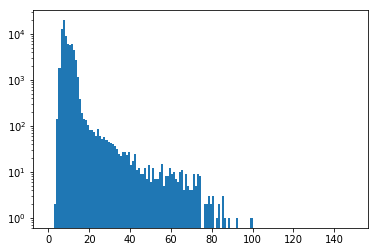

In [24]:
hist(diff_stress, bins=np.arange(0,150,1));
yscale('log')
diff_stress_min = np.min(diff_stress);
diff_stress_max = np.max(diff_stress);
diff_stress_mean = np.mean(diff_stress);
print "Min: %.2f" % diff_stress_min
print "Max: %.2f" % diff_stress_max
print "Mean: %.2f" % diff_stress_mean

In [7]:
fname = './irq_lat/no_stress/untitled.csv'
    
data = np.genfromtxt(fname,dtype=float, delimiter=',',skip_header=1)
ts = data[:,0];
C1 = data[:,1];
C2 = data[:,2];

ref = get_events(ts,C1,"UP");
irq = get_events(ts,C2,"UP");
irq = irq[irq > ref[0]];
cnt = min(len(ref), len(irq));
ref = ref[0:cnt-1];
irq = irq[0:cnt-1];

In [8]:
diff_no_stress = (irq - ref)*1e6;

Min: 1.75
Max: 21.33
Mean: 3.10


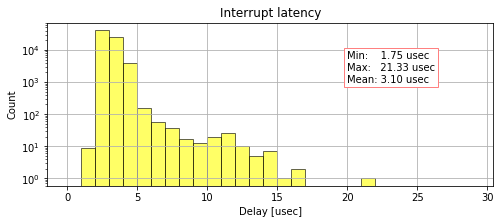

In [31]:
figure(figsize=(8,3))

hist(diff_no_stress, bins=np.arange(0,30,1), alpha = 0.6,label='xenomai',edgecolor='k',Color='yellow');
yscale('log')
diff_no_stress_min = np.min(diff_no_stress);
diff_no_stress_max = np.max(diff_no_stress);
diff_no_stress_mean = np.mean(diff_no_stress);
print "Min: %.2f" % diff_no_stress_min
print "Max: %.2f" % diff_no_stress_max
print "Mean: %.2f" % diff_no_stress_mean

grid()
xlabel('Delay [usec]');
ylabel('Count');
title('Interrupt latency')
text(20,1e3,'Min:    %.2f usec\nMax:   %.2f usec\nMean: %.2f usec' % (diff_no_stress_min, diff_no_stress_max,diff_no_stress_mean), ha='left', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5),  fc="white"))
savefig('./irq_lat/irq_no_stress',bbox_inches = "tight");